In [2]:
import os.path
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text
from keras.preprocessing.text import Tokenizer
#from keras.datasets import imdb
from keras.preprocessing import sequence
import urllib.request
import os
import tarfile

In [25]:
IMDB_DATADIR = os.path.join('C:\\Users\\frogm\\.keras\\data_test')

In [26]:
print(IMDB_DATADIR)
print(model)

C:\Users\frogm\.keras\data_test


In [27]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(datadir=IMDB_DATADIR,
                                                                       classes=['pos','neg'],
                                                                       maxlen=128,
                                                                       val_pct=0.1,
                                                                       train_test_names=['train_b','test_b'],
                                                                       preprocess_mode='bert')

detected encoding: GB18030
Decoding with GB18030 failed 1st attempt - using GB18030 with skips
skipped 118 lines (0.3%) due to character decoding errors
skipped 118 lines (0.3%) due to character decoding errors
downloading pretrained BERT model (chinese_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: zh-cn


Is Multi-Label? False
preprocessing test...
language: zh-cn


In [7]:
model = text.text_classifier(name='bert',
                            train_data=(x_train, y_train),
                            preproc=preproc) 

Is Multi-Label? False
maxlen is 128
done.


In [8]:
learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=32)

In [10]:
learner.fit_onecycle(lr=2e-5,
                    epochs=5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
1/1 [==============================] - 12s 12s/step - loss: 0.6363 - accuracy: 0.5909 - val_loss: 0.6847 - val_accuracy: 0.5455
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 0.6550 - accuracy: 0.5909 - val_loss: 0.6444 - val_accuracy: 0.5455
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 0.6789 - accuracy: 0.5909 - val_loss: 0.6935 - val_accuracy: 0.5455
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 0.6136 - accuracy: 0.5909 - val_loss: 0.6881 - val_accuracy: 0.5455
Epoch 5/5
1/1 [==============================] - 4s 4s/step - loss: 0.5824 - accuracy: 0.5909 - val_loss: 0.6570 - val_accuracy: 0.5455


In [11]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...


E:\Anaconda\lib\site-packages\ktrain\core.py:546: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  warnings.warn('max_epochs is being set to 5 since steps per epoch is small. ' +\


Epoch 1/5
1/1 [==============================] - 0s 150ms/step - loss: 0.5048 - accuracy: 0.7273
Epoch 2/5
1/1 [==============================] - 0s 85ms/step - loss: 0.5448 - accuracy: 0.6364
Epoch 3/5
1/1 [==============================] - 0s 55ms/step - loss: 0.4986 - accuracy: 0.8182
Epoch 4/5
1/1 [==============================] - 0s 51ms/step - loss: 1.6238 - accuracy: 0.4091
Epoch 5/5
1/1 [==============================] - 0s 144ms/step - loss: 1.7495 - accuracy: 0.5909


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


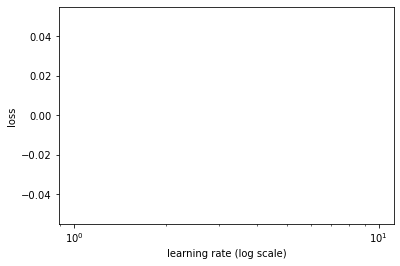

In [14]:
learner.lr_plot()

In [10]:
learner.view_top_losses(n=1, preproc=preproc)

AttributeError: 'str' object has no attribute 'name'